          City     State  Population        lat        lon
36     Buffalo  New York      258959  42.886447 -78.878369
247  Rochester  New York      210358  43.161030 -77.610922
295    Yonkers  New York      199766  40.931210 -73.898747
521   Syracuse  New York      144669  43.048122 -76.147424
890   New York  New York     8405837  40.712784 -74.005941


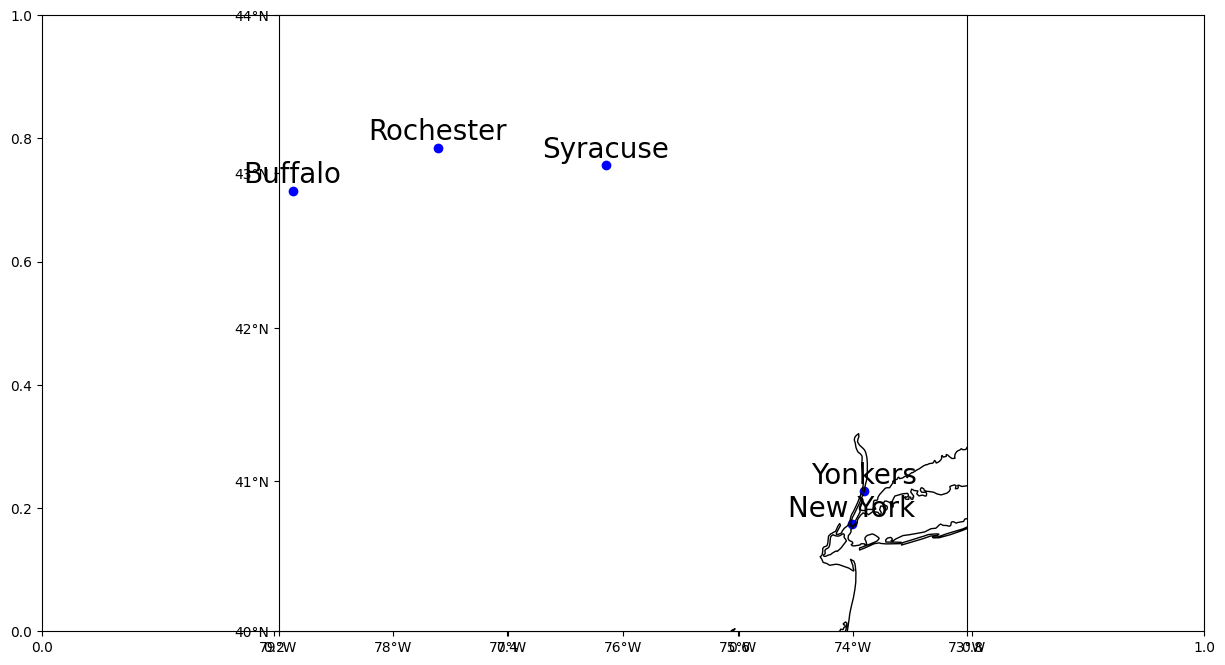

In [1]:
'''Отобразим на рисунке города Америки, штата Нью Юрк, с населением более 140 т. чел'''
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
us_cities = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv')
nw_cities=us_cities[us_cities.State.eq('New York')]

top_nw_cities=nw_cities[nw_cities.Population.ge(140000)]
print(top_nw_cities)
fig, ax =plt.subplots(figsize=(15,8))
ax=plt.axes(projection=ccrs.Mercator())
ax.coastlines('10m')
ax.set_yticks([40, 41, 42, 43, 44], crs=ccrs.PlateCarree())
ax.set_xticks([-79, -78, -77, -76, -75, -74, -73], crs=ccrs.PlateCarree())
lon_formatter=LongitudeFormatter()
lat_formatter=LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)
ax.set_extent([-79, -73, 40, 44])
X=top_nw_cities['lon']
Y=top_nw_cities['lat']
cities=top_nw_cities['City']
ax.scatter(X, Y, color='blue', marker='o', transform=ccrs.PlateCarree())
for i  in X.index:
    label=cities[i]
    plt.text(X[i], Y[i]+0.05, label, clip_on=True, fontsize=20, horizontalalignment='center', transform=ccrs.Geodetic())
plt.show()